<a href="https://colab.research.google.com/github/noncenceforgame-spec/GoogleCollab/blob/main/%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Список доступных датасетов

Эта ячейка выводит список некоторых датасетов, доступных в библиотеке `torchvision.datasets`, которые могут быть автоматически загружены.

In [2]:
import torchvision.datasets as datasets

print("Список некоторых датасетов из torchvision.datasets, доступных для автоматической загрузки:")

# Список некоторых классов датасетов, которые обычно поддерживают download=True
downloadable_datasets = [
    'MNIST',
    'FashionMNIST',
    'KMNIST',
    'EMNIST',
    'QMNIST',
    'CIFAR10',
    'CIFAR100',
    'SVHN',
    'STL10',
    'FakeData', # Это синтетический датасет, но доступен через API
    'USPS',
    'VOCSegmentation', # Доступен для загрузки
    'VOCDetection' # Доступен для загрузки
]

for ds_name in downloadable_datasets:
    try:
        # Проверяем наличие класса датасета по имени
        ds_class = getattr(datasets, ds_name, None)
        if ds_class is not None:
             print(f"- {ds_name}")
        # else:
        #     print(f"- {ds_name} (класс не найден, возможно, недоступен в этой версии)") # Оставляем только найденные
    except Exception as e:
        print(f"- {ds_name} (ошибка при проверке: {e})")

print("\nПримечание: Полный список с деталями доступен в официальной документации по ссылке.")

Список некоторых датасетов из torchvision.datasets, доступных для автоматической загрузки:
- MNIST
- FashionMNIST
- KMNIST
- EMNIST
- QMNIST
- CIFAR10
- CIFAR100
- SVHN
- STL10
- FakeData
- USPS
- VOCSegmentation
- VOCDetection

Примечание: Полный список с деталями доступен в официальной документации по ссылке.


# Загрузка CIFAR10



In [3]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Определение трансформаций (преобразование к тензору и нормализация)
# Эти трансформации соответствуют тем, что часто используются для CIFAR10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Пример нормализации
])

# Загрузка тренировочной части датасета CIFAR10
# download=True скачает датасет, если он еще не загружен
try:
    trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    print(f"Тренировочный датасет CIFAR10 успешно загружен. Размер датасета: {len(trainset)}")

    # Загрузка тестовой части датасета CIFAR10
    testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    print(f"Тестовый датасет CIFAR10 успешно загружен. Размер датасета: {len(testset)}")

    # Пример доступа к элементу тренировочного датасета
    image, label = trainset[0]
    print(f"Тип изображения: {type(image)}, Размер изображения: {image.shape}")
    print(f"Тип метки: {type(label)}, Метка: {label}")

except Exception as e:
    print(f"Ошибка при загрузке датасета CIFAR10: {e}")

100%|██████████| 170M/170M [00:06<00:00, 26.5MB/s]


Тренировочный датасет CIFAR10 успешно загружен. Размер датасета: 50000
Тестовый датасет CIFAR10 успешно загружен. Размер датасета: 10000
Тип изображения: <class 'torch.Tensor'>, Размер изображения: torch.Size([3, 32, 32])
Тип метки: <class 'int'>, Метка: 6


# Просмотр примеров изображений из CIFAR10

Эта ячейка содержит код для отображения нескольких примеров изображений из датасета CIFAR10 вместе с их метками.

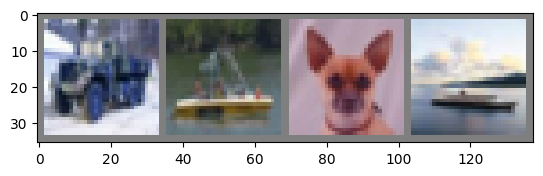

truck ship  dog   ship 


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision # Импортируем torchvision
import torch # Импортируем torch

# Функция для отображения изображения
def imshow(img):
    img = img / 2 + 0.5     # денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получение нескольких случайных тренировочных изображений с помощью DataLoader
# Убедитесь, что trainset определен из предыдущей ячейки
try:
    # Создаем DataLoader для получения пакета данных
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=2)

    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # Отображение изображений
    imshow(torchvision.utils.make_grid(images))

    # Вывод меток классов
    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

except NameError:
    print("Ошибка: Датасет 'trainset' не найден. Пожалуйста, убедитесь, что предыдущая ячейка с загрузкой датасета была успешно выполнена.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

# Подготовка данных для обучения VGG и Resnet

### Определение трансформаций данных

Для подготовки данных к обучению моделей VGG и ResNet, которые обычно ожидают входные изображения размером 224x224 пикселя и используют стандартизированную нормализацию (часто с использованием средних значений и стандартных отклонений датасета ImageNet), мы определим соответствующие трансформации. Для тренировочного набора данных будут добавлены аугментации для улучшения обобщающей способности модели.

In [5]:
import torchvision.transforms as transforms

# Определим трансформации для тренировочного набора данных с аугментацией
train_transform = transforms.Compose([
    transforms.Resize(256),          # Изменение размера изображения до 256x256
    transforms.RandomCrop(224),      # Случайная обрезка до 224x224
    transforms.RandomHorizontalFlip(), # Случайное горизонтальное отражение
    transforms.ToTensor(),           # Преобразование в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Нормализация ImageNet
])

# Определим трансформации для тестового набора данных (без аугментации)
test_transform = transforms.Compose([
    transforms.Resize(256),          # Изменение размера изображения до 256x256
    transforms.CenterCrop(224),      # Обрезка центральной части до 224x224
    transforms.ToTensor(),           # Преобразование в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Нормализация ImageNet
])

print("Трансформации данных определены.")

Трансформации данных определены.


## Создание Dataloaders

In [6]:
import torch

# Создание датасетов с применением новых трансформаций
# Убедитесь, что trainset и testset определены из предыдущих ячеек
try:
    trainset_transformed = datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=train_transform)
    testset_transformed = datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=test_transform)

    # Определение DataLoader'ов
    trainloader_transformed = torch.utils.data.DataLoader(trainset_transformed, batch_size=100,
                                                          shuffle=True, num_workers=2)

    testloader_transformed = torch.utils.data.DataLoader(testset_transformed, batch_size=100,
                                                         shuffle=False, num_workers=2)

    print("Даталоадеры для тренировочного и тестового наборов данных успешно созданы.")
    print(f"Количество батчей в тренировочном даталоадере: {len(trainloader_transformed)}")
    print(f"Количество батчей в тестовом даталоадере: {len(testloader_transformed)}")

except NameError:
    print("Ошибка: Датасеты 'trainset' или 'testset' не найдены. Пожалуйста, убедитесь, что предыдущие ячейки были успешно выполнены.")
except Exception as e:
    print(f"Произошла ошибка при создании даталоадеров: {e}")

Даталоадеры для тренировочного и тестового наборов данных успешно созданы.
Количество батчей в тренировочном даталоадере: 500
Количество батчей в тестовом даталоадере: 100


# Task
Определить модели VGG16 и ResNet18 с предварительно обученными весами, адаптировать их для классификации 10 классов CIFAR10, описать архитектуры и результаты на русском языке.

## Определение моделей

### Subtask:
Создать ячейки кода для определения моделей VGG16 и ResNet18 с использованием предварительно обученных весов (pre-trained).


In [7]:
import torchvision.models as models

# Define VGG16 model with pre-trained weights
vgg16 = models.vgg16(pretrained=True)
print("VGG16 model with pre-trained weights defined.")

# Define ResNet18 model with pre-trained weights
resnet18 = models.resnet18(pretrained=True)
print("ResNet18 model with pre-trained weights defined.")

# Print the models to verify they are loaded
print("\nVGG16 model architecture:")
print(vgg16)

print("\nResNet18 model architecture:")
print(resnet18)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:03<00:00, 161MB/s]


VGG16 model with pre-trained weights defined.
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


ResNet18 model with pre-trained weights defined.

VGG16 model architecture:
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inpl

## Адаптация моделей для cifar10

### Subtask:
Изменить финальные слои моделей VGG16 и ResNet18, чтобы они подходили для классификации 10 классов датасета CIFAR10.


In [8]:
import torch.nn as nn

# Define the number of output classes for CIFAR10
num_classes = 10

# Modify the final layer of VGG16
# VGG16's classifier is a sequence of linear layers
# The last linear layer is vgg16.classifier[6]
num_ftrs_vgg = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_ftrs_vgg, num_classes)

# Modify the final layer of ResNet18
# ResNet18's final layer is a fully connected layer named 'fc'
num_ftrs_resnet = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs_resnet, num_classes)

print("Final layers of VGG16 and ResNet18 modified for 10 classes.")

# Print the modified final layers to verify
print("\nModified final layer of VGG16:")
print(vgg16.classifier[6])

print("\nModified final layer of ResNet18:")
print(resnet18.fc)

Final layers of VGG16 and ResNet18 modified for 10 classes.

Modified final layer of VGG16:
Linear(in_features=4096, out_features=10, bias=True)

Modified final layer of ResNet18:
Linear(in_features=512, out_features=10, bias=True)


## Описание моделей

### Subtask:
Предоставить описание архитектур VGG и ResNet на русском языке в markdown ячейках.


In [9]:
%%markdown
# Описание архитектуры VGG

Архитектура VGG (Visual Geometry Group) - это сверточная нейронная сеть, разработанная в Оксфордском университете. Ее ключевая особенность заключается в использовании очень маленьких сверточных ядер размера 3x3 на протяжении всей сети. Вместо использования больших ядер (например, 7x7 или 11x11), VGG использует несколько последовательных слоев с ядром 3x3, что позволяет достичь того же рецептивного поля, но с меньшим количеством параметров и большим количеством нелинейных преобразований.

Другой важной чертой VGG является последовательное увеличение количества фильтров (каналов) после каждого пулингового слоя, что позволяет сети улавливать все более сложные признаки по мере углубления.

Использование предварительно обученных весов (полученных на больших датасетах, таких как ImageNet) является стандартной практикой при работе с архитектурой VGG для задач классификации. Эти веса содержат информацию о низкоуровневых и среднеуровневых признаках, которые могут быть эффективно перенесены на новые задачи, такие как классификация изображений CIFAR10, даже если новый датасет меньше исходного. Адаптация для CIFAR10 включает замену финального классификационного слоя для соответствия количеству классов (10 в случае CIFAR10).

# Описание архитектуры VGG

Архитектура VGG (Visual Geometry Group) - это сверточная нейронная сеть, разработанная в Оксфордском университете. Ее ключевая особенность заключается в использовании очень маленьких сверточных ядер размера 3x3 на протяжении всей сети. Вместо использования больших ядер (например, 7x7 или 11x11), VGG использует несколько последовательных слоев с ядром 3x3, что позволяет достичь того же рецептивного поля, но с меньшим количеством параметров и большим количеством нелинейных преобразований.

Другой важной чертой VGG является последовательное увеличение количества фильтров (каналов) после каждого пулингового слоя, что позволяет сети улавливать все более сложные признаки по мере углубления.

Использование предварительно обученных весов (полученных на больших датасетах, таких как ImageNet) является стандартной практикой при работе с архитектурой VGG для задач классификации. Эти веса содержат информацию о низкоуровневых и среднеуровневых признаках, которые могут быть эффективно перенесены на новые задачи, такие как классификация изображений CIFAR10, даже если новый датасет меньше исходного. Адаптация для CIFAR10 включает замену финального классификационного слоя для соответствия количеству классов (10 в случае CIFAR10).


In [10]:
%%markdown
# Описание архитектуры ResNet

ResNet (Residual Network) - это инновационная архитектура сверточных нейронных сетей, разработанная для решения проблемы затухания градиента в очень глубоких сетях. Ключевая идея ResNet заключается в использовании "остаточных соединений" (residual connections) или "shortcuts", которые позволяют напрямую передавать входные данные блока к его выходу, минуя один или несколько сверточных слоев.

Математически, вместо того чтобы учиться отображению H(x) (где x - вход блока), блок учится отображению F(x) = H(x) - x. Тогда выход блока становится F(x) + x. Если оптимальное отображение близко к тождественному (т.е., H(x) ≈ x), то остаточное отображение F(x) будет близко к нулю, и сети будет легче оптимизировать небольшие изменения, чем учить тождественное отображение с нуля. Это позволяет строить гораздо более глубокие сети без существенной деградации производительности из-за проблем с градиентами.

Как и в случае с VGG, для задач классификации на небольших датасетах, таких как CIFAR10, часто используют предварительно обученные на ImageNet веса ResNet. Эти веса предоставляют хорошую отправную точку, а финальный полносвязный слой адаптируется под количество классов целевого датасета.

# Описание архитектуры ResNet

ResNet (Residual Network) - это инновационная архитектура сверточных нейронных сетей, разработанная для решения проблемы затухания градиента в очень глубоких сетях. Ключевая идея ResNet заключается в использовании "остаточных соединений" (residual connections) или "shortcuts", которые позволяют напрямую передавать входные данные блока к его выходу, минуя один или несколько сверточных слоев.

Математически, вместо того чтобы учиться отображению H(x) (где x - вход блока), блок учится отображению F(x) = H(x) - x. Тогда выход блока становится F(x) + x. Если оптимальное отображение близко к тождественному (т.е., H(x) ≈ x), то остаточное отображение F(x) будет близко к нулю, и сети будет легче оптимизировать небольшие изменения, чем учить тождественное отображение с нуля. Это позволяет строить гораздо более глубокие сети без существенной деградации производительности из-за проблем с градиентами.

Как и в случае с VGG, для задач классификации на небольших датасетах, таких как CIFAR10, часто используют предварительно обученные на ImageNet веса ResNet. Эти веса предоставляют хорошую отправную точку, а финальный полносвязный слой адаптируется под количество классов целевого датасета.


## Функции для обучения и тестирования

### Subtask:
Создать ячейки кода с функциями для обучения и тестирования моделей.


In [11]:
import torch
import torch.nn as nn

def train_model(model, trainloader, criterion, optimizer, num_epochs, device):
    """
    Trains the given model.

    Args:
        model (torch.nn.Module): The model to train.
        trainloader (torch.utils.data.DataLoader): DataLoader for the training data.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        num_epochs (int): The number of training epochs.
        device (torch.device): The device to use for training (cpu or gpu).
    """
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:    # print every 100 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

    print('Finished Training')

def test_model(model, testloader, device):
    """
    Tests the given model and calculates accuracy.

    Args:
        model (torch.nn.Module): The model to test.
        testloader (torch.utils.data.DataLoader): DataLoader for the test data.
        device (torch.device): The device to use for testing (cpu or gpu).

    Returns:
        float: The accuracy of the model on the test set.
    """
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')
    return accuracy

print("Training and testing functions defined.")

Training and testing functions defined.


## Обучение моделей

Обучить определенные модели VGG16 и ResNet18 на тренировочном наборе данных CIFAR10.


In [ ]:
import torch.optim as optim

# 1. Determine the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Define the loss function
criterion = nn.CrossEntropyLoss()
print("Loss function (CrossEntropyLoss) defined.")

# 3. Define optimizers for each model
# For this example, we will train all parameters
optimizer_vgg16 = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
optimizer_resnet18 = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)
print("Optimizers (SGD) defined for VGG16 and ResNet18.")


# 4. Set the number of epochs for training
num_epochs = 1 # Keep epochs low for demonstration

print(f"Number of epochs set to: {num_epochs}")

# 5. Train the VGG16 model
print("\nStarting training for VGG16...")
train_model(vgg16, trainloader_transformed, criterion, optimizer_vgg16, num_epochs, device)

# 6. Train the ResNet18 model
print("\nStarting training for ResNet18...")
train_model(resnet18, trainloader_transformed, criterion, optimizer_resnet18, num_epochs, device)

Using device: cpu
Loss function (CrossEntropyLoss) defined.
Optimizers (SGD) defined for VGG16 and ResNet18.
Number of epochs set to: 1

Starting training for VGG16...


## Тестирование моделей

### Subtask:
Оценить производительность обученных моделей на тестовом наборе данных CIFAR10.


In [ ]:
# Evaluate VGG16 model
print("\nEvaluating VGG16 model on the test set...")
vgg16_accuracy = test_model(vgg16, testloader_transformed, device)

# Evaluate ResNet18 model
print("\nEvaluating ResNet18 model on the test set...")
resnet18_accuracy = test_model(resnet18, testloader_transformed, device)